In [1]:
import numpy as np

In [2]:
X_size = 300

In [3]:
X = 2 * np.random.randn(X_size, 1)

In [4]:
y = 4 + 3 * X + np.random.randn(X_size, 1)

In [5]:
import matplotlib.pyplot as plt

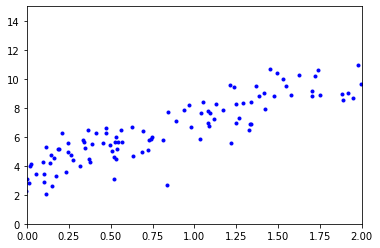

In [6]:
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
X_b = np.c_[np.ones((X_size, 1)), X] # Add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.05435617],
       [2.98532458]])

In [9]:
X_new = np.array([[0], [2]])

In [10]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # Add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[ 4.05435617],
       [10.02500532]])

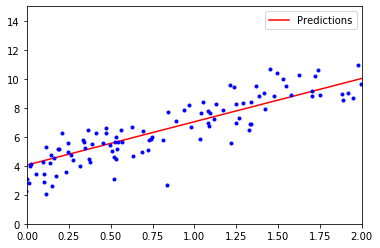

In [11]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [12]:
theta_best_min = theta_best - np.array([[1.5],[0]])
theta_best_max = theta_best + np.array([[1.5],[0]])

In [13]:
y_predict_min = X_new_b.dot(theta_best_min)
y_predict_max = X_new_b.dot(theta_best_max)

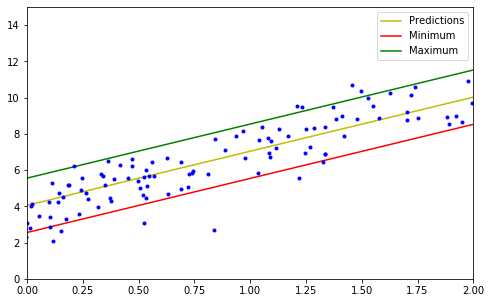

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(X_new, y_predict, "y-", label="Predictions")
plt.plot(X_new, y_predict_min, "r-", label="Minimum")
plt.plot(X_new, y_predict_max, "g-", label="Maximum")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

Mesma regressão linear implementada com scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lin_reg.intercept_, lin_reg.coef_

(array([4.05435617]), array([[2.98532458]]))

In [18]:
prediction = lin_reg.predict(X_new)
print(prediction)

[[ 4.05435617]
 [10.02500532]]


In [19]:
prediction[0]

array([4.05435617])

In [20]:
lin_reg.coef_

array([[2.98532458]])

### Batch Gradient Descent

In [21]:
eta = 0.05
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

In [22]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [23]:
theta

array([[4.05435617],
       [2.98532458]])

### Stochastic gradient descent

In [24]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyper parameters

In [25]:
def learning_schedule(t):
    return t0 / (t + t1)

In [26]:
theta = np.random.randn(2,1) # Random initialization

In [27]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi =   y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [28]:
theta

array([[4.12875888],
       [2.93494238]])

In [29]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.08432888]), array([2.98996555]))

### Polynomial regression

In [31]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [32]:
X = np.sort(X)

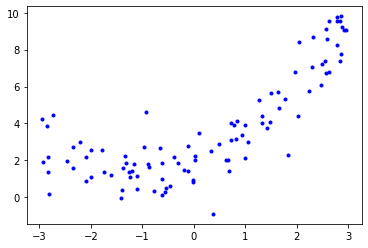

In [33]:
plt.plot(X, y, "b.")
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.02649047]
[0.02649047 0.00070175]


In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87885544]), array([[1.06706282, 0.48869017]]))

In [36]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_predictions = lin_reg.predict(X_new_poly)
# print(y_predictions.shape)
# print(X_poly.shape)
# print(X.shape)

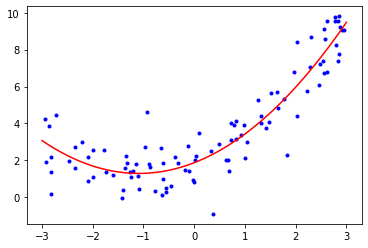

In [37]:
plt.plot(X, y, "b.") 
plt.plot(X_new, y_predictions, "r-")
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [62]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mse(y_train[:m], y_train_predict))
        val_errors.append(mse(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")

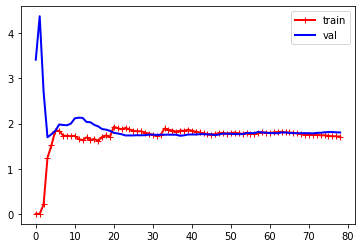

In [67]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend()

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [75]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
#    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

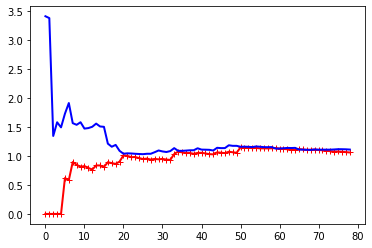

In [76]:
plot_learning_curves(polynomial_regression, X, y)

### Ridge Regression

In [78]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [81]:
ridge_reg.predict([[1.5]])

array([[5.259801]])

In [84]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.24164615])

### Lasso Regression

In [85]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
lasso_reg.predict([[1.5]])

array([5.2243743])

In [88]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [89]:
sgd_reg.predict([[1.5]])

array([5.25839405])

### Elastic Net

In [90]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
elastic_net.predict([[1.5]])

array([5.2203743])